In [42]:
import networkx as nx
import csv
import sys
import time

DEBUG = False

def buildG(G, file_, delimiter_):
    with open(file_, 'r') as f:
        reader = csv.reader(f, delimiter=delimiter_)
        for line in reader:
            if len(line) > 2:
                if float(line[2]) != 0.0:
                    # line format: u,v,w
                    G.add_edge(int(line[0]), int(line[1]), weight=float(line[2]))
            else:
                # line format: u,v
                G.add_edge(int(line[0]), int(line[1]), weight=1.0)

def cmtyGirvanNewmanStep(G):
    if DEBUG:
        print("Running cmtyGirvanNewmanStep method ...")
    init_ncomp = nx.number_connected_components(G) 
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        bw = nx.edge_betweenness_centrality(G, weight='weight')
        max_ = max(bw.values())
        for k, v in bw.items():
            if v == max_:
                G.remove_edge(*k)
        ncomp = nx.number_connected_components(G) 

def girvanNewmanGetModularity(G, deg_, m_):
    New_A = nx.adjacency_matrix(G)
    New_deg = updateDeg(New_A, G.nodes())
    comps = nx.connected_components(G) 
    # print('No of communities in decomposed G: {}'.format(nx.number_connected_components(G)))
    Mod = 0 
    for c in comps:
        EWC = 0 
        RE = 0 
        for u in c:
            EWC += New_deg[u]
            RE += deg_[u] 
        Mod += (EWC - RE * RE / (2 * m_))
    Mod = Mod / (2 * m_)
    if DEBUG:
        print("Modularity: {}".format(Mod))
    return Mod

def updateDeg(A, nodes):
    deg_dict = {}
    n = len(nodes)
    B = A.sum(axis=1)
    for i, node_id in enumerate(nodes):
        deg_dict[node_id] = B[i, 0]
    return deg_dict

def runGirvanNewman(G, Orig_deg, m_):
    BestQ = 0.0
    Q = 0.0
    while True:
        cmtyGirvanNewmanStep(G)
        Q = girvanNewmanGetModularity(G, Orig_deg, m_)
        # print("Modularity of decomposed G: {}".format(Q))
        if Q > BestQ:
            BestQ = Q
            Bestcomps = list(nx.connected_components(G))  # Best Split
            # print("Identified components: {}".format(Bestcomps))
        if G.number_of_edges() == 0:
            break
    if BestQ > 0.0:
        print("Max modularity found (Q): {} and number of communities: {}".format(BestQ, len(Bestcomps)))
        print("Graph communities: {}".format(Bestcomps))
        return Bestcomps
    else:
        print("Max modularity (Q):", BestQ)
        return None


In [25]:
import matplotlib.pyplot as plt

def read_graph_from_csv(file_name):
    G = nx.Graph()
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            G.add_edge(line[0], line[1], weight=float(line[2]))
    return G

def draw_graph(G, size = (10, 7)):
    fig = plt.figure(figsize=size) 
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=False)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()
G = read_graph_from_csv("data/got-s1-edges.csv")

In [26]:
if DEBUG:
    print('G nodes: {} & G no of nodes: {}'.format(G.nodes(), G.number_of_nodes()))

n = G.number_of_nodes()  # |V|
A = nx.adjacency_matrix(G)  # adjacency matrix

m_ = 0.0  
for i in range(0, n):
    for j in range(0, n):
        m_ += A[i, j]
m_ = m_ / 2.0
if DEBUG:
    print("m: {}".format(m_))

# calculate the weighted degree for each node
Orig_deg = updateDeg(A, G.nodes())

# run Girvan-Newman algorithm
communities = runGirvanNewman(G, Orig_deg, m_)

/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3509442284.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/1533098680.py:33: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


No of communities in decomposed G: 2
Modularity of decomposed G: 0.0738794194052468
Identified components: [{'SANSA', 'JOANNA', 'LANCEL', 'BRANDON_STARK', 'ILYN_PAYNE', 'MERYN_TRANT', 'STABLE_BOY', 'CERSEI', 'JOFFREY', 'BENJEN', 'MASHA_HEDDLE', 'TOMMEN', 'JON_ARRYN', 'OSHA', 'MYCAH', 'VARDIS_EGEN', 'DAENERYS', 'PYP', 'GRENN', 'ROBERT', 'LYSA', 'TOMARD', 'OTHELL_YARWYCK', 'HUGH_OF_THE_VALE', 'VARLY', 'GENDRY', 'VARYS', 'WAYMAR_ROYCE', 'MACE', 'CATELYN', 'AEGON', 'BOWEN_MARSH', 'LEO_LEFFORD', 'BAELOR', 'MYRCELLA', 'LITTLEFINGER', 'THEON', 'MHAEGEN', 'STEVRON_FREY', 'ASSASSIN', 'JONOS_BRACKEN', 'MELESSA', 'MOUNTAIN', 'TYWIN', 'PYCELLE', 'RENLY', 'JAREMY_RYKKER', 'RODRIK', 'GREATJON_UMBER', 'BARRISTAN', 'MORD', 'SAM', 'GARED', 'ROYCE', 'WILL', 'ROBIN', 'LUKE', 'HOUND', 'ARYA', 'OLD_NAN', 'AERYS', 'HOT_PIE', 'ADDAM_MARBRAND', 'LORAS', 'ROOSE_BOLTON', 'RICKARD_KARSTARK', 'GALBART_GLOVER', 'RHAEGAR', 'OTHOR', 'YOREN', 'MAESTER_AEMON', 'RANDYLL', 'BALON', 'JON', 'TYSHA', 'RAST', 'BERIC', 'KEVA

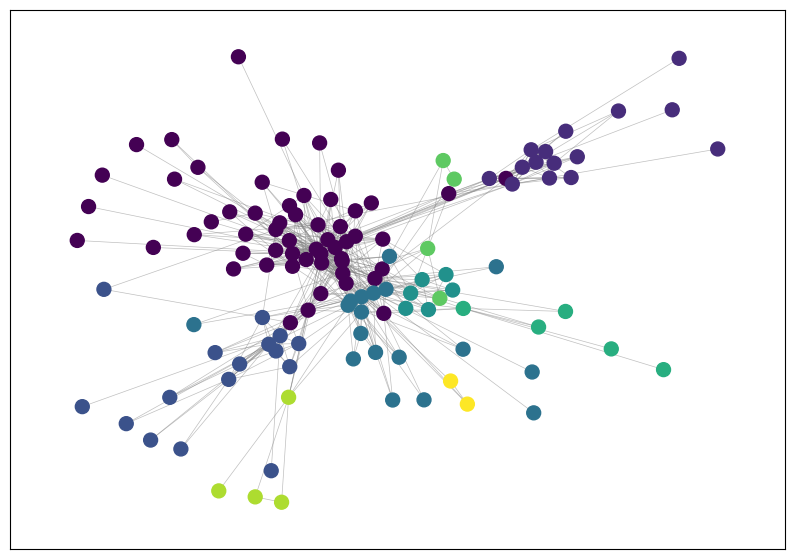

In [29]:
def draw_comunities(G, communities):
    fig = plt.figure(figsize=(10, 7)) 
    pos = nx.spring_layout(G)
    color_map = []
    for node in G:
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(i)
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color=color_map)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, edge_color='gray')
    plt.show()

GG = read_graph_from_csv("data/got-s1-edges.csv")
draw_comunities(GG, communities)

In [40]:
#create a graph from a andjency matrix from a csv file 

import numpy as np

def create_graph_from_adjacency_matrix(path):
    A = np.loadtxt(path, delimiter=',')
    G = nx.Graph()
    n = A.shape[0]
    for i in range(0, n):
        for j in range(0, n):
            if A[i, j] != 0:
                G.add_edge(i, j, weight=A[i, j])
    return G


def calculate_communities(G):
    start_time = time.time()
    n = G.number_of_nodes()  # |V|
    A = nx.adjacency_matrix(G)  # adjacency matrix

    m_ = 0.0  
    for i in range(0, n):
        for j in range(0, n):
            m_ += A[i, j]
    m_ = m_ / 2.0
    if DEBUG:
        print("m: {}".format(m_))

    # calculate the weighted degree for each node
    Orig_deg = updateDeg(A, G.nodes())

    # run Girvan-Newman algorithm
    communities = runGirvanNewman(G, Orig_deg, m_)
    print("--- %s seconds ---" % (time.time() - start_time))

    color_map = {}
    for node in G:
        for i, community in enumerate(communities):
            if node in community:
                color_map[node] = i
    return color_map

In [43]:
# 1
G1 = create_graph_from_adjacency_matrix("data/competition/D1-UNC.csv")
task1 = calculate_communities(G1)
print(task1)


/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/2385943585.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3799695125.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


Max modularity found (Q): 0.7215434400659759 and number of communities: 17
Graph communities: [{0, 1, 2, 3, 4}, {80, 81, 82, 83, 84}, {64, 15, 16, 17, 18, 19, 60, 61, 62, 63}, {32, 33, 34, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 30, 31}, {45, 46, 47, 48, 49}, {10, 11, 12, 13, 14}, {5, 6, 7, 8, 9, 40, 42, 44, 43, 41}, {20, 21, 22, 23, 24}, {50, 51, 52, 53, 54}, {70, 71, 72, 73, 74}, {110, 111, 112, 113, 114, 85, 86, 87, 88, 89}, {96, 97, 98, 35, 36, 37, 38, 39, 99, 105, 106, 107, 108, 109, 95}, {65, 66, 67, 68, 69}, {25, 26, 27, 28, 29}, {100, 101, 102, 103, 104, 75, 76, 77, 78, 79}, {55, 56, 57, 58, 59}, {90, 91, 92, 93, 94}]
--- 2.5064258575439453 seconds ---
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 81: 1, 15: 2, 124: 3, 48: 4, 61: 2, 115: 3, 13: 5, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 22: 7, 116: 3, 52: 8, 70: 9, 112: 10, 34: 3, 44: 6, 10: 5, 11: 5, 12: 5, 14: 5, 84: 1, 38: 11, 39: 11, 45: 4, 16: 2, 17: 2, 18: 2, 19: 2, 64: 2, 32: 3, 43: 6, 67: 12, 20: 7, 21: 7, 23: 7, 24: 7, 106: 11, 26: 1

In [44]:
# 2
G2 = create_graph_from_adjacency_matrix("data/competition/D2-UNC.csv")
task2 = calculate_communities(G2)
print(task2)

/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/2385943585.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3799695125.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


Max modularity found (Q): 0.6512307605251245 and number of communities: 15
Graph communities: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}, {128, 129, 120, 121, 122, 123, 124, 125, 126, 127}, {140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}, {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}, {100, 101, 102, 103, 104, 105, 106, 107, 108, 109}, {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {110, 111, 112, 113, 114, 115, 116, 117, 118, 119}, {130, 131, 132, 133, 134, 135, 136, 137, 138, 139}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}]
--- 22.963765859603882 seconds ---
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 39: 1, 42: 2, 127: 3, 149: 4, 55: 5, 65: 6, 86: 7, 95: 8, 106: 9, 43: 2, 66: 6, 72: 10, 77: 10, 108: 9, 116: 11, 143: 4, 147: 4, 33: 1, 105

In [45]:
# 3
G3 = create_graph_from_adjacency_matrix("data/competition/D3-UNC.csv")
task3 = calculate_communities(G3)
print(task3)

/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/2385943585.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3799695125.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


Max modularity found (Q): 0.5518512115833013 and number of communities: 9
Graph communities: [{0, 1, 2, 3, 4, 5, 6, 7, 8}, {32, 33, 34, 35, 27, 28, 29, 30, 31}, {36, 37, 38, 39, 40, 41, 42, 43, 44}, {45, 46, 47, 48, 49, 50, 51, 52, 53}, {54, 55, 56, 57, 58, 59, 60, 61, 62}, {64, 65, 66, 67, 68, 69, 70, 71, 63}, {18, 19, 20, 21, 22, 23, 24, 25, 26}, {72, 73, 74, 75, 76, 77, 78, 79, 80}, {9, 10, 11, 12, 13, 14, 15, 16, 17}]
--- 4.184568881988525 seconds ---
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 33: 1, 39: 2, 43: 2, 46: 3, 58: 4, 64: 5, 69: 5, 20: 6, 23: 6, 26: 6, 28: 1, 35: 1, 41: 2, 51: 3, 80: 7, 17: 8, 57: 4, 75: 7, 48: 3, 67: 5, 78: 7, 30: 1, 56: 4, 73: 7, 16: 8, 44: 2, 49: 3, 62: 4, 9: 8, 10: 8, 11: 8, 12: 8, 13: 8, 14: 8, 15: 8, 52: 3, 22: 6, 71: 5, 36: 2, 53: 3, 61: 4, 76: 7, 38: 2, 70: 5, 34: 1, 74: 7, 77: 7, 18: 6, 19: 6, 21: 6, 24: 6, 25: 6, 60: 4, 79: 7, 27: 1, 32: 1, 68: 5, 54: 4, 47: 3, 59: 4, 63: 5, 72: 7, 29: 1, 31: 1, 55: 4, 37: 2, 40: 2, 42: 2, 45: 3, 50:

In [48]:
# save it in csv in format: node, community + 1
import csv

def save_communities(communities, path):
    with open(path, 'w') as f:
        writer = csv.writer(f)
        for i in range(0, len(communities)):
            writer.writerow([i, communities[i] + 1])

save_communities(task1, "data/results/D1-UNC.csv")
save_communities(task2, "data/results/D2-UNC.csv")
save_communities(task3, "data/results/D3-UNC.csv")

In [49]:
# 1
G1 = create_graph_from_adjacency_matrix("data/competition/D1-K=2.csv")
task1 = calculate_communities(G1)
print(task1)

Max modularity found (Q): 0.4012984878369493 and number of communities: 5
Graph communities: [{0, 1, 3, 7, 11, 12, 13, 15, 16, 17}, {2, 18, 20, 21, 22, 26}, {32, 33, 8, 19, 23, 24, 25, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 14}, {9}]
--- 0.12476897239685059 seconds ---
{0: 0, 1: 0, 2: 1, 3: 0, 7: 0, 13: 0, 15: 0, 16: 0, 17: 0, 25: 2, 4: 3, 5: 3, 6: 3, 8: 2, 10: 3, 11: 0, 12: 0, 26: 1, 9: 4, 21: 1, 22: 1, 27: 2, 14: 3, 33: 2, 18: 1, 19: 2, 20: 1, 23: 2, 24: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2}


/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/2385943585.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3799695125.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


In [50]:
# 2
G2 = create_graph_from_adjacency_matrix("data/competition/D2-K=7.csv")
task2 = calculate_communities(G2)
print(task2)

/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/2385943585.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3799695125.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


Max modularity found (Q): 0.5193821446936435 and number of communities: 5
Graph communities: [{0, 2, 10, 42, 47, 28, 30}, {3, 8, 12, 14, 16, 20, 33, 34, 36, 37, 38, 40, 43, 44, 46, 49, 50, 52, 58, 59}, {35, 4, 11, 45, 15, 18, 51, 23, 21, 55, 24, 29}, {1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60}, {53, 61}]
--- 0.5367858409881592 seconds ---
{0: 0, 10: 0, 14: 1, 15: 2, 40: 1, 42: 0, 47: 0, 1: 3, 17: 3, 19: 3, 26: 3, 27: 3, 28: 0, 36: 1, 41: 3, 54: 3, 2: 0, 44: 1, 61: 4, 3: 1, 8: 1, 59: 1, 4: 2, 51: 2, 5: 3, 9: 3, 13: 3, 56: 3, 57: 3, 6: 3, 7: 3, 30: 0, 20: 1, 37: 1, 45: 2, 32: 3, 29: 2, 11: 2, 12: 1, 33: 1, 16: 1, 24: 2, 34: 1, 38: 1, 43: 1, 50: 1, 52: 1, 18: 2, 55: 2, 22: 3, 25: 3, 31: 3, 21: 2, 23: 2, 35: 2, 60: 3, 49: 1, 39: 3, 58: 1, 46: 1, 53: 4, 48: 3}


In [51]:
# 3
G3 = create_graph_from_adjacency_matrix("data/competition/D3-K=12.csv")
task3 = calculate_communities(G3)
print(task3)

/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/2385943585.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # adjacency matrix
/var/folders/1g/986bqpf10xb46wt30rh54c8h0000gn/T/ipykernel_90167/3799695125.py:34: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  New_A = nx.adjacency_matrix(G)


Max modularity found (Q): 0.599458710005349 and number of communities: 11
Graph communities: [{0, 3, 9, 108, 14, 83, 85, 21, 58}, {98, 36, 8, 11, 44, 107, 84, 94}, {96, 33, 79, 16, 113, 54, 28, 61, 62}, {35, 4, 101, 5, 103, 105, 106, 109, 110, 111, 47, 50, 88, 56, 27}, {1, 67, 102, 15, 49, 18, 19, 89, 29}, {65, 34, 97, 71, 40, 43, 12, 17, 87, 92}, {2, 100, 69, 68, 37, 72, 52, 55, 30}, {32, 99, 6, 104, 73, 45, 46, 112, 51, 20, 23, 25, 59, 31, 93, 57}, {64, 7, 42, 75, 74, 78, 82, 114, 53, 90, 60}, {66, 70, 39, 38, 41, 76, 13, 81, 86, 22, 24, 26, 91}, {10, 77, 80, 48, 95, 63}]
--- 8.905921936035156 seconds ---
{0: 0, 3: 0, 8: 1, 9: 0, 14: 0, 54: 2, 58: 0, 61: 2, 83: 0, 85: 0, 108: 0, 111: 3, 1: 4, 11: 1, 15: 4, 18: 4, 19: 4, 29: 4, 36: 1, 43: 5, 49: 4, 67: 4, 89: 4, 98: 1, 102: 4, 2: 6, 21: 0, 30: 6, 37: 6, 52: 6, 55: 6, 68: 6, 69: 6, 72: 6, 99: 7, 100: 6, 90: 8, 101: 3, 110: 3, 4: 3, 23: 7, 35: 3, 50: 3, 75: 8, 88: 3, 103: 3, 105: 3, 106: 3, 109: 3, 5: 3, 7: 8, 27: 3, 47: 3, 6: 7, 33: 2,

In [ ]:
save_communities(task1, "data/results/D1-K=2.csv")
save_communities(task2, "data/results/D2-K=7.csv")
save_communities(task3, "data/results/D3-K=12.csv")